피사체를 가깝게 찍을 때 배경이 흐려지는 효과를 경험해 보신 적이 있으신가요? 보통은 DSLR이나 미러리스 같은 전문적인 카메라와 렌즈에서 만들어 내기 쉬운 효과입니다. 하지만 피사체를 충분히 가까운 거리에 두고 촬영한다면 핸드폰 카메라에서도 비슷한 효과를 낼 수 있습니다.

특히 2개 이상의 렌즈를 탑재한 최신 핸드폰에서는 **'인물사진 모드(portrait mode)'**가 지원됩니다.

* DSLR에서는 사진을 촬영할 때 피사계 심도(depth of field, DOF)를 얕게 하여 초점이 맞은 피사체를 제외한 배경을 흐리게 만듭니다.
* 핸드폰 인물사진 모드는 화각이 다른 두 렌즈를 사용합니다. 일반(광각) 렌즈에서는 배경을 촬영하고 망원 렌즈에서는 인물을 촬영한 뒷배경을 흐리게 처리한 후 망원 렌즈의 인물과 적절하게 합성합니다.

**인물사진 모드에서 사용되는 용어**

한국에서는 배경을 흐리게 하는 기술을 주로 **'아웃포커싱'**이라고 표현합니다. 정확한 영어 표현은 **얕은 피사계 심도(shallow depth of field)** 또는 **셸로우 포커스(shallow focus)** 라고 합니다. 핸드폰 제조사에서는 **'인물사진(portrait)'**이라는 직관적인 용어를 잘 만들어 낸 것 같습니다.

## **Step 1. 인물모드 직접 해 보기**

* 여러분의 셀카를 이용해서 오늘 배운 내용을 수행해 봅시다. 아래와 같은 이미지를 얻어야 합니다. 최소 3장 이상의 인물모드 사진을 만들어 봅시다.
* 인물이 주인공이 아닌, 귀여운 고양이에 대한 아웃포커싱 사진도 만들어 볼 수 있을 것입니다. 시맨틱 세그멘테이션 스텝에서 힌트를 찾아봅시다.
* 배경을 blur하는 인물모드 사진이 아니라 배경사진을 다른 이미지로 교체하는 크로마키 배경 합성을 시도해 볼 수도 있을 것입니다. 여러분만의 환상적인 사진을 만들어 보면 어떨까요?

In [3]:
# os: Operating System의 줄임말로, 운영체제에서 제공되는 여러 기능을 파이썬에서 사용할 수 있도록 함 (Ex. 디렉토리 경로 이동, 시스템 환경 변수 가져오기 등)
# urllib: URL 작업을 위한 여러 모듈을 모은 패키지. (Ex. urllib.request, urllib.parse, ...)
# cv2: OpenCV 라이브러리로, 실시간 컴퓨터 비전을 목적으로 한 프로그래밍 라이브러리
# numpy(NumPy): 행렬이나 대규모 다차원 배열을 쉽게 처리할 수 있도록 지원하는 라이브러리. 데이터 구조 외에도 수치 계산을 위해 효율적으로 구현된 기능을 제공
# pixellib: 이미지 및 비디오 segmentation을 수행하기 위한 라이브러리.
# pixellib.semantic: segmentation 기법 중, semantic segmentation을 쉽게 사용할 수 있도록 만든 라이브러리
# matplotlib: 파이썬 프로그래밍 언어 및 수학적 확장 NumPy 라이브러리를 활용한 플로팅 라이브러리로, 데이터 시각화 도구
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt
from importlib.metadata import version
import pixellib

준비한 이미지를 읽습니다.

(3024, 3024, 3)


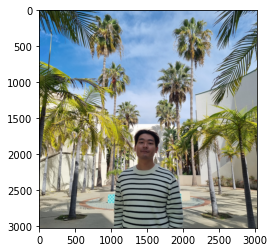

In [2]:
# os 모듈에 있는 getenv() 함수를 이용하여 읽고싶은 파일의 경로를 file_path에 저장
# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/02. goLA.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
# plt.show(): 현재 열려있는 모든 figure를 표시 (여기서 figure는 이미지, 그래프 등)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

### **세그멘테이션(Segmentation)이 뭔가요?**
***
이미지에서 픽셀 단위로 관심 객체를 추출하는 방법을 **이미지 세그멘테이션(image segmentation)** 이라고 합니다.

**시맨틱 세그멘테이션(semantic segmentation)**이란?

우리가 인식하는 세계처럼 물리적 의미 단위로 인식하는 세그멘테이션을 **시맨틱 세그멘테이션** 이라고 합니다. 쉽게 설명하면 이미지에서 픽셀을 사람, 자동차, 비행기 등의 **물리적 단위로 분류(classification)하는 방법**이라고 이해하시면 됩니다.

**인스턴스 세그멘테이션(Instance segmentation)**이란?

**시맨틱 세그멘테이션**은 '사람'이라는 추상적인 정보를 이미지에서 추출해 내는 방법입니다. 그래서 사람이 누구인지 관계없이 같은 라벨로 표현이 됩니다.

더 나아가서 **인스턴스 세그멘테이션**은 사람 개개인별로 다른 라벨을 가지게 합니다. 여러 사람이 한 이미지에 등장할 때 각 객체를 분할해서 인식하자는 것이 목표입니다.

***
**Q. 위 이미지의 MS COCO 데이터셋 라벨은 인스턴스 세그멘테이션이라고 부를 수 있을까요?**

네. 부를 수 있습니다. 사람이라는 한 클래스 내에서도 각각의 개체가 구분되어 있기 때문입니다.

**Q. 인스턴스 세그멘테이션 데이터셋과 라벨이 존재하면 시맨틱 세그멘테이션을 학습시킬 수 있을까요?**

인스턴스의 id 뿐만이 아닌 클래스 라벨이 존재해야 시맨틱 세그멘테이션으로 학습이 가능합니다. 근본적으로는 다른 개념이지만 대부분의 데이터셋은 인스턴스 라벨이 있는 경우 클래스 라벨도 함께 존재합니다.

### **딥러닝에 기반한 방법 이전에는 어떻게 이미지 세그멘테이션을 했을까?**
***

이미지에서 영역을 분할하는 가장 간단한 방법은 물체의 '경계'를 나누는 것입니다. 그럼 경계는 어떻게 나눌 수 있을까요?

이미지는 **그레이스케일(grayscale)로 변환**하면 **0~255의 값**을 가집니다. 픽셀 값을 이용해서 각 위치의 높고 낮음을 구분할 수 있습니다. 낮은 부분부터 서서히 '물'을 채워 나간다고 생각하면 **각 영역에서 점점 물이 차오르다가 넘치는 시점이 생기게 됩니다.** 그 부분을 경계선으로 만들면 물체를 서로 구분할 수 있게 됩니다.

In [3]:
# 저장할 파일 이름을 결정합니다
# 1. os.getenv(x)함수는 환경 변수x의 값을 포함하는 문자열 변수를 반환합니다. model_dir 에 "/aiffel/human_segmentation/models" 저장
# 2. #os.path.join(a, b)는 경로를 병합하여 새 경로 생성 model_file 에 "/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5" 저장
# 1
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7fa3d84c5e80>)

그다음 다운로드한 모델을 이용해 PixelLib로 우리가 사용할 세그멘테이션 모델을 생성합니다.

In [4]:
model = semantic_segmentation() #PixelLib 라이브러리에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듦
model.load_pascalvoc_model(model_file) # pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

이제 모델에 이미지를 입력해 볼게요.

In [5]:
# segmentAsPascalvoc() 함수를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴
# 분할은 pacalvoc 데이터로 학습된 모델을 이용
segvalues, output = model.segmentAsPascalvoc(img_path)

`segmentAsPascalvoc`라는 함수는 PASCAL VOC 데이터로 학습된 모델을 이용한다는 의미입니다. 

모델마다 학습시킨 데이터에 따라 결괏값이 달라지므로 어떤 데이터를 학습시켰는지 확인하는 것은 매우 중요합니다.

* [PASCAL VOC]('http://host.robots.ox.ac.uk/pascal/VOC/')

PASCAL VOC 데이터의 라벨 종류는 아래와 같습니다.

In [6]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

우리는 이 중 사람(`person`) 라벨, 즉 `15`를 가진 영역만 검출해 내고 싶습니다. 이제 사람만 어떻게 추출할 수 있을지 알아봅시다.

아까 모델에서 나온 출력값을 살짝 살펴볼게요.

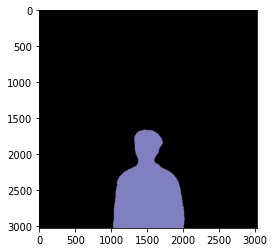

In [7]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

In [8]:
# segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력
segvalues

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [9]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


`output`에는 세그멘테이션이 된 결과가 각각 다른 색상으로 담겨 있네요. `segvalues`에는 `class_ids`와 `masks`가 있습니다. `class_ids`를 통해 어떤 물체가 담겨 있는지 알 수 있군요!

이제 물체마다 `output`에 어떤 색상으로 나타나 있는지만 알아내면 될 것 같습니다.

In [10]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!

#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

`PixelLib`에 따르면 위와 같은 색을 사용했다고 하네요. 그럼 사람을 나타내는 `15`번째 색상은 무엇일까요?

In [11]:
#컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)
colormap[15]

array([192, 128, 128])

사람 외에도 다른 물체를 찾아내고 싶다면 `colormap[class_id]`처럼 찾아낼 수 있겠네요!

여기서 주의할 것은 `output` 이미지가 BGR 순서로 채널 배치가 되어 있다는 점이에요. `colormap`은 RGB 순서이고요.

그러니 우리가 추출해야 하는 색상 값은 순서를 아래처럼 바꿔 줘야 합니다.

In [12]:
# 색상순서 변경
# colormap의 배열은 RGB 순이며 
# output의 배열은 BGR 순서로 채널 배치가 되어 있어서
seg_color = (128,128,192)

이제 `seg_color`로만 이루어진 마스크를 만들어 봅시다.

(3024, 3024)


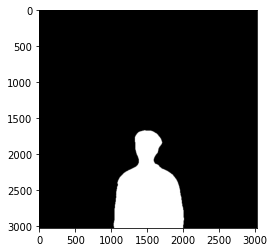

In [13]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

어떤가요? 3채널 가졌던 원본과는 다르게 채널 정보가 사라졌습니다.

이제 아래처럼 물체가 있는 위치는 1(True), 그 외에는 0(False)인 배열이 되었습니다.

원래 이미지와 겹쳐 보면 세그멘테이션이 얼마나 잘 되었는지 알아보기 쉬울 것 같네요.

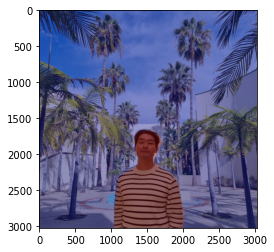

In [14]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### **배경 흐리게 하기**

***
이번에는 배경을 흐리게 만듭니다. `blur()` 함수를 이용합니다.

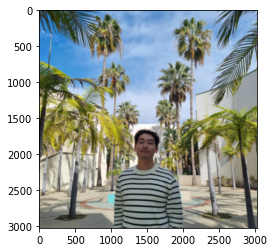

In [15]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (13,13))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

흐려진 이미지에서 세그멘테이션 마스크를 이용해서 배경만 추출하겠습니다.

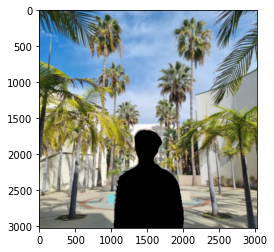

In [16]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

`bitwise_not` 함수를 이용하면 이미지가 반전됩니다. 원래 마스크에서는 배경이 0, 사람이 255였으니 `bitwise_not` 연산을 하고 나면 배경은 255, 사람은 0이 되겠죠?

반전된 세그멘테이션 결과를 이용해서 이미지와 `bitwise_and` 연산을 수행하면 배경만 있는 영상을 얻을 수 있습니다. 0과 어떤 수를 `bitwise_and` 연산을 해도 0이 되기 때문에 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지게 되는 거죠.

### **흐린 배경과 원본 영상 합성**
***
이제 배경 영상과 사람 영상을 합치기만 하면 되겠죠?

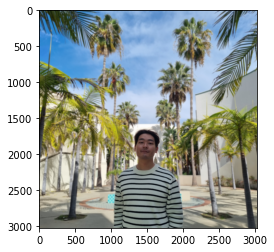

In [17]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

세그멘테이션 **마스크가 255**인 부분만 **원본 이미지 값**을 가지고 오고 **아닌 영역**은 **블러된 이미지 값을 사용**합니다. 
**np.where(조건, 참일때, 거짓일때)의 형식의 코드를 사용**했네요.

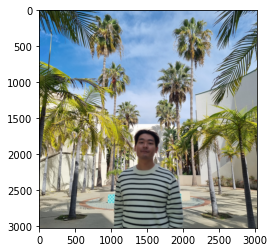

In [18]:
# Q. 이번에는 사람 부분을 블러로, 배경 부분을 원본으로 출력해볼까요?
# 힌트 : img_mask_color 옵션을 적절히 조정해주고, img_orig, img_orig_blur 를 활용하세요.
img_concat = np.where(img_mask_color==255, img_orig_blur, img_orig)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

***
* 여러분의 셀카를 이용해서 오늘 배운 내용을 수행해 봅시다. 아래와 같은 이미지를 얻어야 합니다. 최소 3장 이상의 인물모드 사진을 만들어 봅시다.

처리 중인 이미지: /aiffel/aiffel/human_segmentation/images/09. goFace_basic.png, 크기: (3216, 1808, 3)


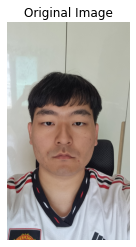

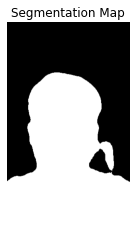

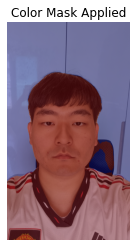

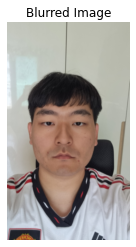

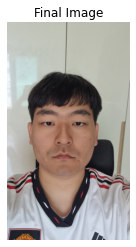

처리 중인 이미지: /aiffel/aiffel/human_segmentation/images/10. goFace_left.png, 크기: (3216, 1808, 3)


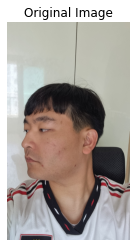

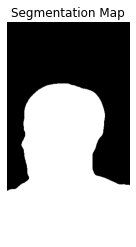

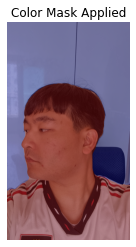

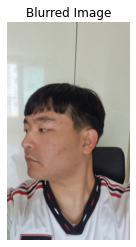

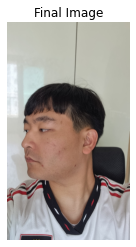

처리 중인 이미지: /aiffel/aiffel/human_segmentation/images/11. goFace_up.png, 크기: (3216, 1808, 3)


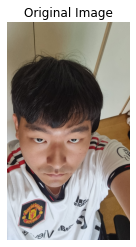

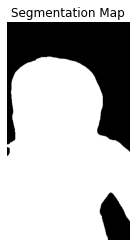

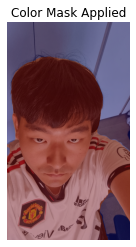

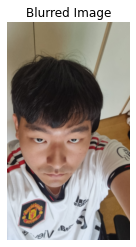

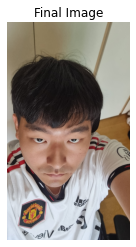

처리 중인 이미지: /aiffel/aiffel/human_segmentation/images/12. goFace_white.png, 크기: (3216, 1808, 3)


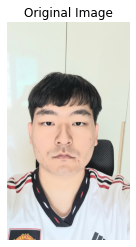

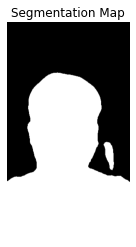

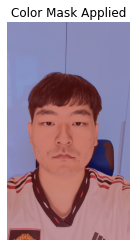

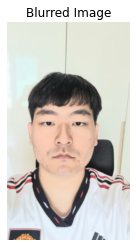

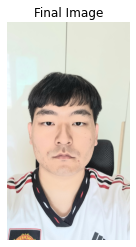

처리 중인 이미지: /aiffel/aiffel/human_segmentation/images/13. goFace_black.png, 크기: (3216, 1808, 3)


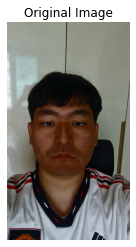

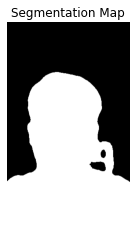

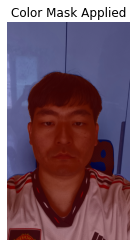

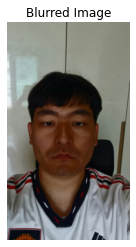

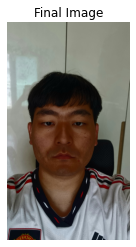

In [19]:
# 모델 파일 경로 설정 및 다운로드 함수 정의하기
def download_model(model_dir, model_file, model_url):
    if not os.path.exists(model_file):
        urllib.request.urlretrieve(model_url, model_file)

# 이미지 시각화 함수 정의하기
def show_image(img, title='Image'):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# 이미지 처리 함수 정의하기
def process_image(model, img_path):
    # 이미지 읽기
    img_orig = cv2.imread(img_path)
    if img_orig is None:
        print(f"이미지를 읽을 수 없습니다: {img_path}")
        return
    
    print(f"처리 중인 이미지: {img_path}, 크기: {img_orig.shape}")

    # 이미지 시각화하기
    show_image(img_orig, 'Original Image')

    # 이미지 분할하기 (semantic segmentation)
    segvalues, output = model.segmentAsPascalvoc(img_path)

    # 사람이 있는 위치를 찾기 위한 색상 정의하기 (RGB)
    seg_color = (128,128,192)
    seg_map = np.all(output == seg_color, axis=-1)
    
    # 이진화 이미지 시각화하기
    plt.imshow(seg_map, cmap='gray')
    plt.title('Segmentation Map')
    plt.axis('off')
    plt.show()

    # 마스크를 컬러맵으로 변환하여 색상 적용 및 이미지 합성하기
    img_mask = seg_map.astype(np.uint8) * 255
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
    img_show = cv2.addWeighted(img_orig, 0.6, color_mask, 0.4, 0.0)
    show_image(img_show, 'Color Mask Applied')

    # 원본 이미지를 블러링 처리하기
    img_orig_blur = cv2.blur(img_orig, (13,13))
    show_image(img_orig_blur, 'Blurred Image')

    # 블러링 처리된 배경 이미지와 원본 이미지를 결합하여 최종 이미지 생성하기
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    img_bg_mask = cv2.bitwise_not(img_mask_color)
    img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
    img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
    show_image(img_concat, 'Final Image')

# 모델 다운로드 및 로드하기
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'
download_model(model_dir, model_file, model_url)

# PixelLib의 semantic segmentation 클래스 인스턴스 생성 및 모델 로드하기
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

# 여러 장의 이미지 경로를 리스트로 저장하기
image_paths = [
    os.getenv('HOME')+'/aiffel/human_segmentation/images/09. goFace_basic.png',
    os.getenv('HOME')+'/aiffel/human_segmentation/images/10. goFace_left.png',
    os.getenv('HOME')+'/aiffel/human_segmentation/images/11. goFace_up.png',
    os.getenv('HOME')+'/aiffel/human_segmentation/images/12. goFace_white.png',
    os.getenv('HOME')+'/aiffel/human_segmentation/images/13. goFace_black.png',
]

# 각 이미지에 대해 처리 수행하기
for img_path in image_paths:
    process_image(model, img_path)

**이미지 데이터셋 분석**
***
1. **Original Image**
* 첫 번째 이미지는 원본 이미지.
* 각도나 밝기에 따라 다양한 모습으로 촬용됨.

2. **Segmentation Map**
* 흰색 부분이 사람, 검은색 부분이 배경을 나타냄
* 문제점 : 일부 이미지에서는 세그멘테이션이 제대로 감지가 되지 않음.

3. **Color Mask Applied**
* 원본 이미지에 사람은 빨간색, 사물은 파란색으로 표기됨.
* 문제점 : 세그멘테이션의 정확도에 따라 여전히 색상 마스크 적용 결과가 달라질 수 있음.

4. **Blurred Image**
* 배경을 블러링 처리하여 객체를 강조함.
* 문제점 : 사물과 객체가 너무 가까이 있어 블러처리가 많이 되지 않음.

5. **Final Image**
* 원본 이미지와 블러 처리된 배경 이미지를 결합하여 사람이 있는 부분만 원본을 유지하고 배경만 블러링 처리를 함.
* 문제점 : Blurred Image와 Segmentation Map의 문제를 동시에 가지고 있음.

***
* 인물이 주인공이 아닌, 다양한 객체에 대한 아웃포커싱 사진도 만들어 볼 수 있을 것입니다. 
시맨틱 세그멘테이션 스텝에서 힌트를 찾아봅시다.

**비행기 세그멘테이션**

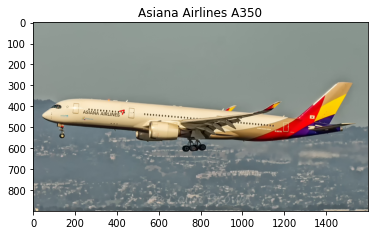

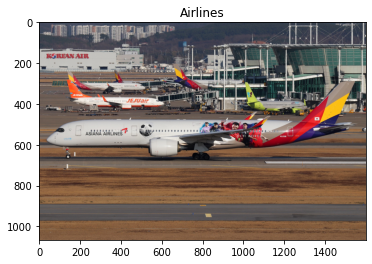

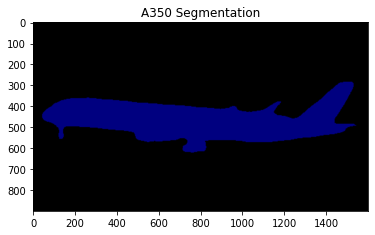

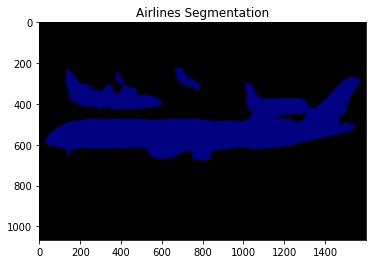

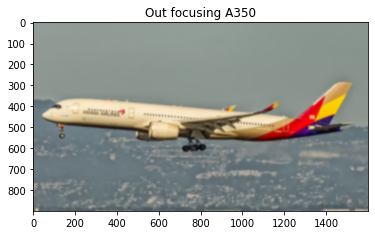

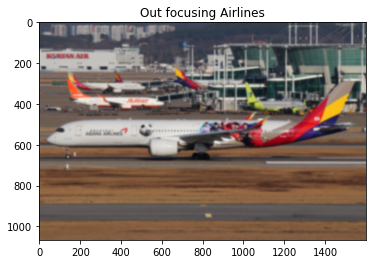

In [23]:
# 이미지 파일 경로 설정 및 이미지 로드
img1_path = os.getenv('HOME') + '/aiffel/human_segmentation/images/03. a350.png'
img2_path = os.getenv('HOME') + '/aiffel/human_segmentation/images/04. airlines.png'
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

# 이미지 출력
if img1 is not None:
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title('Asiana Airlines A350')
    plt.show()

if img2 is not None:
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.title('Airlines')
    plt.show()

# 모델 경로 설정 및 DeepLabv3 모델 로드
model_dir = os.getenv('HOME') + '/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

# 이미지 세그멘테이션 및 결과 출력
if img1 is not None:
    segvalues1, output1 = model.segmentAsPascalvoc(img1_path)
    plt.imshow(output1)
    plt.title('A350 Segmentation')
    plt.show()

if img2 is not None:
    segvalues2, output2 = model.segmentAsPascalvoc(img2_path)
    plt.imshow(output2)
    plt.title('Airlines Segmentation')
    plt.show()

# 비행기 세그먼트 추출
seg_color_airplane = (0, 128, 128)  # Pascal VOC에서 'aeroplane'의 색상
if img1 is not None:
    seg_map1 = np.all(output1 == seg_color_airplane, axis=-1)
if img2 is not None:
    seg_map2 = np.all(output2 == seg_color_airplane, axis=-1)

# 아웃포커싱 적용
if img1 is not None:
    out_focused_img1 = apply_out_focus(img1, seg_map1)
    plt.imshow(cv2.cvtColor(out_focused_img1, cv2.COLOR_BGR2RGB))
    plt.title('Out focusing A350')
    plt.show()

if img2 is not None:
    out_focused_img2 = apply_out_focus(img2, seg_map2)
    plt.imshow(cv2.cvtColor(out_focused_img2, cv2.COLOR_BGR2RGB))
    plt.title('Out focusing Airlines')
    plt.show()

> 실험을 진행하면서 제일 의아해했던 부분이었다. 분명 세그멘테이션은 어느 정도 됐다고 생각했는데, 아웃포커싱을 했을 때, 모든 부분이 블러처리가 되었다. 물론 코드 문제일 것 같지만, 이 부분을 나중에 다시 한번 살펴봐야겠다고 생각했다.

**소파 세그멘테이션**

(788, 1400, 3)


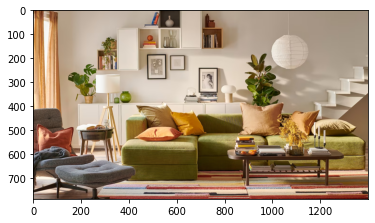

In [25]:
sofa_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/05. living_room.png'  
sofa_orig = cv2.imread(sofa_path) 

print(sofa_orig.shape)

plt.imshow(cv2.cvtColor(sofa_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [26]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [27]:
segvalues, output = model.segmentAsPascalvoc(sofa_path)

In [28]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

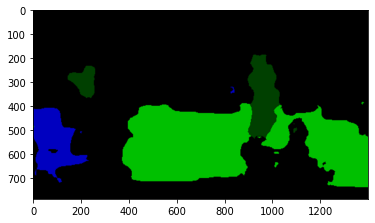

In [29]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

In [30]:
# segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력
segvalues

{'class_ids': array([ 0,  9, 16, 18]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [31]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
pottedplant
sofa


In [32]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!

#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [33]:
#컬러맵 18에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 18번째인 소파)
colormap[18]

array([  0, 192,   0])

In [34]:
# 색상순서 변경
# colormap의 배열은 RGB 순이며 
# output의 배열은 BGR 순서로 채널 배치가 되어 있어서
seg_color = (0, 192, 0)

(788, 1400)


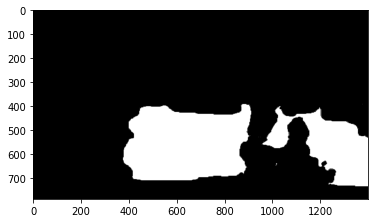

In [35]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 sofa을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

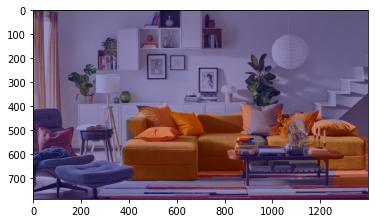

In [37]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
sofa_show = sofa_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
sofa_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(sofa_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
sofa_show = cv2.addWeighted(sofa_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(sofa_show, cv2.COLOR_BGR2RGB))
plt.show()

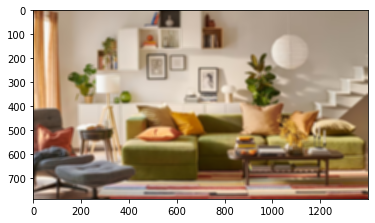

In [38]:
sofa_orig_blur = cv2.blur(sofa_orig, (13,13))
plt.imshow(cv2.cvtColor(sofa_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

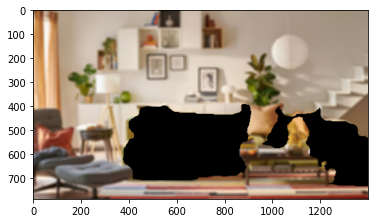

In [39]:
sofa_mask_color = cv2.cvtColor(sofa_mask, cv2.COLOR_GRAY2BGR)

sofa_bg_mask = cv2.bitwise_not(sofa_mask_color)

sofa_bg_blur = cv2.bitwise_and(sofa_orig_blur, sofa_bg_mask)
plt.imshow(cv2.cvtColor(sofa_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

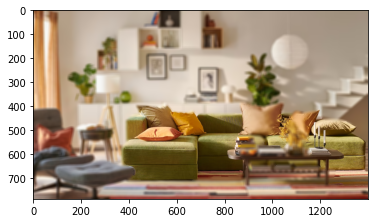

In [40]:
# 흐린 배경과 원본 영상 합성
sofa_concat = np.where(sofa_mask_color==255, sofa_orig, sofa_bg_blur)

plt.imshow(cv2.cvtColor(sofa_concat, cv2.COLOR_BGR2RGB))
plt.show()

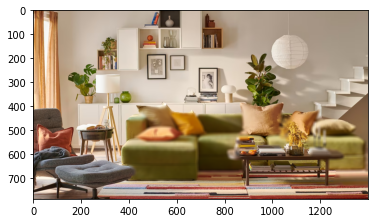

In [42]:
# 사람 부분을 블러, 배경 부분은 원본으로 출력하기
sofa_concat = np.where(sofa_mask_color==255, sofa_orig_blur, sofa_orig)
plt.imshow(cv2.cvtColor(sofa_concat, cv2.COLOR_BGR2RGB))
plt.show()

> 소파라는 것을 잘 인식하기도 하지만, 일부분의 경우에는 잘 인식되지 않는 경우도 있었음.
> 
> 또한 소파가 아닌 객체도 소파와 같이 붙어 있어서 소파라고 인식하는 경우도 있었음.

***
* 배경을 blur하는 인물모드 사진이 아니라 배경사진을 다른 이미지로 교체하는 크로마키 배경 합성을 시도해 볼 수도 있을 것입니다. 
여러분만의 환상적인 사진을 만들어 보면 어떨까요?

In [5]:
# 이미지 경로 설정
calgary_path = os.getenv('HOME') + '/aiffel/human_segmentation/images/01. goCalgary.png'
calgary_orig = cv2.imread(calgary_path)

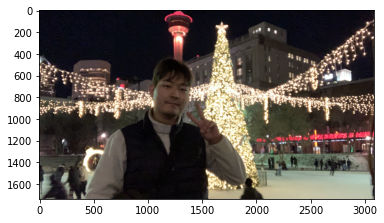

In [6]:
# 원본 이미지 출력
plt.imshow(cv2.cvtColor(calgary_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
# 모델 로드 및 세그멘테이션
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)
segvalues, output = model.segmentAsPascalvoc(calgary_path)

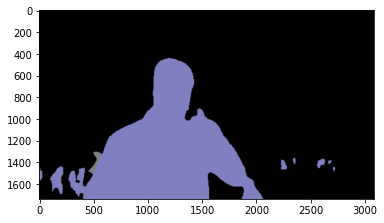

In [8]:
# 세그멘테이션 결과 출력
plt.imshow(output)
plt.show()

In [12]:
# pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

# 세그멘테이션 결과 클래스 출력하기
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
car
person


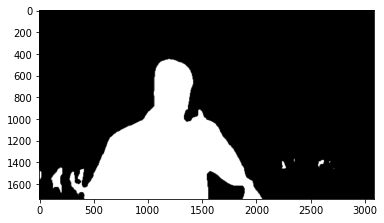

In [13]:
# 특정 컬러맵 설정
seg_color = (128, 128, 192)
seg_map = np.all(output == seg_color, axis=-1)
plt.imshow(seg_map, cmap='gray')
plt.show()

In [14]:
# 원본 이미지 복사본 생성
calgary_show = calgary_orig.copy()

In [15]:
# 사람 위치를 마스크로 변환
calgary_mask = seg_map.astype(np.uint8) * 255

In [16]:
# 초록색 배경 이미지 생성
green_background = np.zeros_like(calgary_orig)
green_background[:] = (0, 255, 0)

In [19]:
# 마스크를 사용하여 배경을 초록색으로 변경
calgary_show[~seg_map] = green_background[~seg_map]

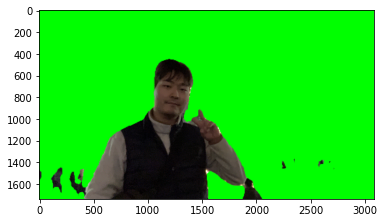

In [20]:
# 결과 이미지 출력
plt.imshow(cv2.cvtColor(calgary_show, cv2.COLOR_BGR2RGB))
plt.show()

## **Step 2. 사진에서 문제점 찾기**
***
그러나 여러분들의 사진에는 무언가 문제점이 있을 것입니다.

어떤 문제가 있는지 찾아서 아래 사진처럼 표시해 봅시다.

추가로 여러분이 만들어 낸 인물 모드 사진 중 하나에서도 이상한 위치를 찾아 아래 사진처럼 표시해 봅시다.

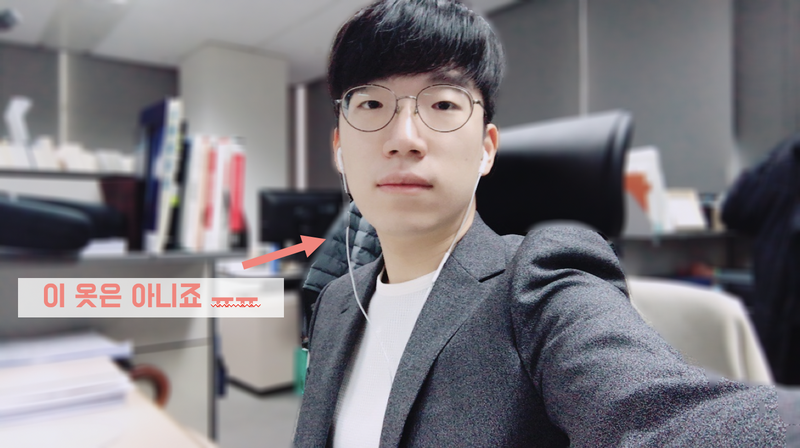

***
1. **사람과 사물 사이에 블러처리된 공간이 명확합니다.** : 사람을 정확하게 탐지를 하긴 하지만, 사진의 특성 상 경계면이 자연스럽게 형성되어야 하는데, 블러처리가 확실하게 됨으로써 사람만 확실하게 강조하는 효과를 줍니다.
2. **객체 뒤에 있는 옷이 있습니다.** : 사람 주변에 있는 옷은 객체와 붙어있는 객체로 확인하고, 이 역시 객체로 인지하는 경향이 있습니다.

***


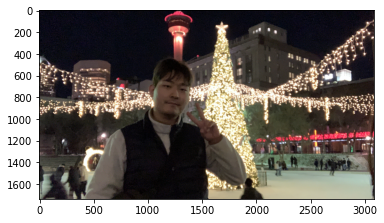

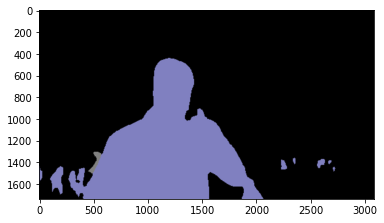

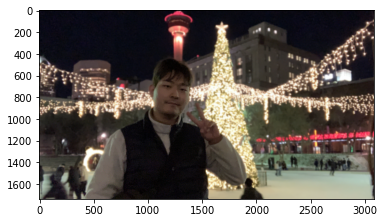

In [22]:
# 블러 처리
blurred_background = cv2.GaussianBlur(calgary_orig, (21, 21), 0)

# 사람 위치를 마스크로 변환
person_mask = seg_map * 255

# 마스크를 사용하여 배경을 블러 처리된 이미지로 변경
calgary_show[person_mask == 0] = blurred_background[person_mask == 0]

# 결과 이미지 출력
plt.imshow(cv2.cvtColor(calgary_show, cv2.COLOR_BGR2RGB))
plt.show()

**문제점**
***
1. **경계의 정확도 부족** : 객체의 외곽선이 매끄럽지 않고, 경계가 불명확합니다. 이는 세그멘테이션 알고리즘이 경계를 정확하게 구분하지 못했음을 나타냅니다. 또한 큰 객체만 탐지하고 싶은데, 나머지 객체도 탐지하여 쓸데없는 부분까지 세그멘테이션이 되었음을 알 수 있습니다.
2. **노이즈와 작은 객체들** : 주요 객체 주위에 작고 불규칙한 점들이 존재합니다. 이러한 노이즈는 세그멘테이션 결과의 정확도를 떨어뜨릴 수 있습니다.
3. **부분적으로 누락된 영역** : 주요 객체가 완전히 세그멘테이션되지 않았고, 일부 영역이 누락되었을 수 있습니다. 예를 들어, 팔이나 어깨의 일부가 정확하게 인식되지 않았습니다.

## **Step 3. 해결 방법을 제안해 보기**
***

아주 간단히 멋진 카메라 앱 서비스를 만들어 출시할 수 있을 것 같았지만, 지금 같은 완성도로는 어림도 없습니다. **소비자들의 눈높이는 그리 호락호락하지 않고, 엔지니어인 여러분들은 답을 찾아내야 합니다.**

아래를 읽어본 후, 여러분이 만든 인물모드 사진의 문제점을 해결할 방안을 정리하여 제안해 주시기 바랍니다.

여러분들이 선택한 기술이 DeepLab 모델의 Semantic Segmentation 이 만들어 낸 Mask 영역에 어떻게 적용되어 문제점을 보완하게 되는지의 메커니즘이 포함된 솔루션이어야 합니다.

**세그멘테이션의 한계**

Semantic segmentation의 부정확성이 여러 가지 문제를 발생시키는 주요 원인입니다.

사계심도를 이용한 **아웃포커싱 효과**는 말 그대로 심도를 표현하기 때문에 **초점이 잡힌 거리를 광학적으로 아주 섬세하게 구별(segmentation)** 하지만 이를 따라 한 semantic segmentation 모듈은 정확도가 1.00 이 되지 않는 한 **완벽히 구현하기는 힘듭니다.**

**아웃포커싱 하는 법**

1. **조리개 값을 낮추기** : 조리개(F) 값을 낮추면 배경이 흐려지고 대상이 더 돋보입니다. 렌즈마다 최대로 낮출 수 있는 값이 정해져 있으니, 단렌즈를 활용하면 더 강한 아웃포커싱 효과를 얻을 수 있습니다.
2. **카메라와 촬영 대상의 거리를 가깝게** : 대상과 카메라를 가깝게 두면 아웃포커싱 효과가 더 강해집니다. 손가락 하나를 눈 가까이에 맞추는 장면을 상상해보세요.
3. **촬영 대상과 배경의 거리를 멀게** : 대상과 배경 사이의 거리가 멀수록 배경이 흐려집니다. 망원렌즈를 사용하면 효과적으로 아웃포커싱을 담을 수 있습니다.
4. **망원렌즈를 활용** : 망원렌즈를 사용하면 광각렌즈보다 더 효과적으로 아웃포커싱을 담을 수 있습니다.

**3D Camera 활용하기**
1. **Matrox Imaging**
- Matrox AltiZ 듀얼 카메라와 단일 레이저 3D 프로파일 센서를 출시했습니다.
- 이 센서는 검사 작업을 대상으로 하며, Matrox Imaging 또는 타사의 머신 비전 소프트웨어와 호환됩니다.
- 프로파일러는 빨간색 또는 파란색 레이저를 사용하며, GigE Vision 인터페이스를 기반으로 합니다.
2. **Zivid**
- Zivid Two color 3D 카메라를 출시했습니다.
- 구조광을 사용하여 고해상도 이미지를 촬영하며, 물류 및 제조 분야에 적합합니다.
- 최근에 특허 받은 3D HDR 기술로 반사 및 흡수 제품을 포함한 다양한 물체를 캡처할 수 있습니다.
3. **IDS Imaging Development Systems**
- Ensenso N40/45 3D 카메라를 출시했습니다.
- 가벼운 디자인과 IP65/67 등급의 산업용 하우징을 제공하며, 로봇 응용 분야에 적합합니다.
4. **LMI Technologies**
- Gocator 3D 프로파일 센서 라인에 새로운 블루 레이저 모델을 도입했습니다.
- 반짝이는 기계 금속 표면의 3D 스캐닝에 적합하며, 전기 차량 배터리 검사, 철도 검사, 자동차 부품 및 공장 자동화 분야에서 활용됩니다.

**소프트웨어 기술 활용하기**

하드웨어 개발과 생산에는 비용이 많이 들기 때문에 제한된 하드웨어를 이용하면서 소프트웨어로 그 한계를 극복하려는 노력도 많습니다.

구글의 struct2Depth가 대표적인 예일 것 같습니다.

**Unsupervised Learning of Depth and Ego-Motion: A Structured Approach**

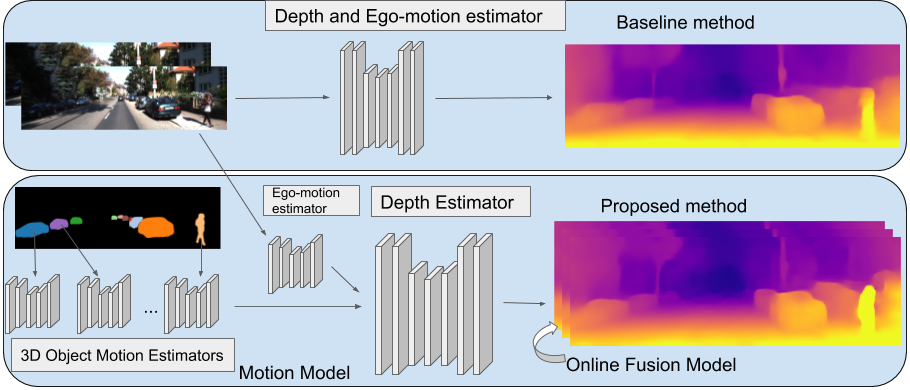
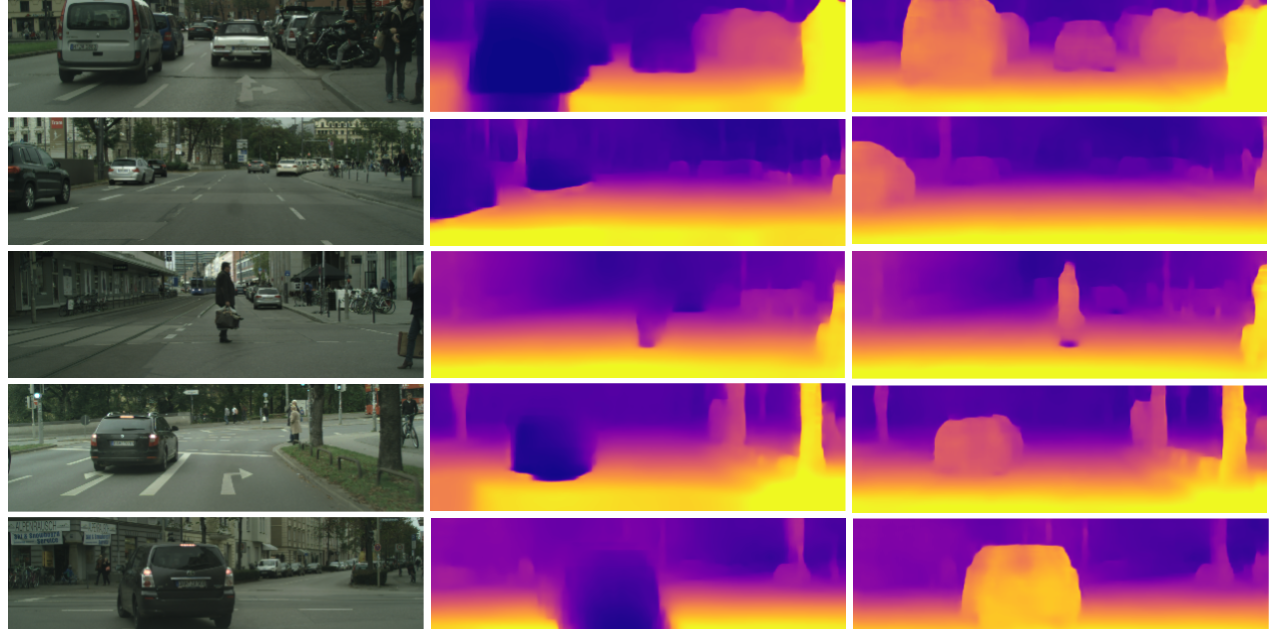

1. **주요 기여**
- **통합 프레임워크** : 깊이와 자기 운동 추정을 단일 모델로 통합하여 두 작업 간의 상호 이점을 활용합니다.
- **새로운 손실 함수** : 기하학적 일관성을 시행하는 손실 함수를 도입하여 추정 정확도를 향상시킵니다.
- **최첨단 성능** : KITTI 및 Cityscapes 데이터셋에서 단일 뷰 깊이 추정 및 시각적 주행거리 측정 작업에서 최첨단 성능을 달성합니다.
- **일반화**: 다양한 환경에서 강력한 성능을 보여주는 일반화 능력을 입증합니다.

2. **핵심 아이디어**
이 논문의 핵심 아이디어는 깊이와 자기 운동 추정을 단일 문제로 모델링하고, 기하학적 일관성을 시행하는 새로운 손실 함수를 사용하여 두 작업 간의 상호 작용을 활용하는 것입니다. 이 접근 방식은 기존 방법보다 더 정확하고 강력한 깊이 및 자기 운동 추정을 가능하게 합니다.

3. **응용 분야**
이 논문에서 제안된 프레임워크는 자율 주행, 로봇 공학, 증강 현실 등 다양한 분야에 적용될 수 있습니다. 특히, 단일 카메라만 사용하여 깊이 정보와 자기 운동을 추정할 수 있기 때문에 비용 효율적이고 실용적인 솔루션을 제공합니다.

[이외에 시도해볼 수 있는 다양한 방법]

1. **데이터 증강 및 다양한 학습 데이터 사용**
모델의 성능을 높이기 위해서는 다양한 상황에서 촬영된 인물 사진을 포함한 대규모 학습 데이터가 필요합니다.
* 데이터 증강: 회전, 확대, 색상 변환 등을 통해 다양한 조건의 학습 데이터를 생성하여 모델의 성능을 향상시킵니다.
    
2. **딥러닝 기반의 세그멘테이션 모델 사용**
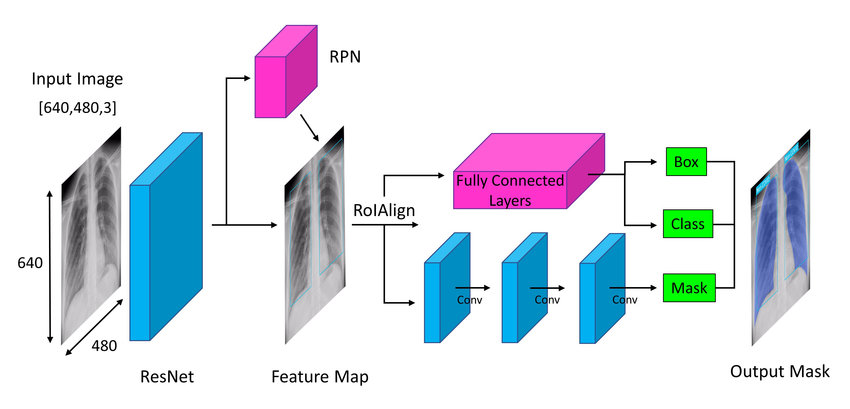
* [Mask R-CNN](https://github.com/matterport/Mask_RCNN)
* **Mask R-CNN**
객체 검출과 인스턴스 세그멘테이션 문제를 동시에 해결하기 위해 개발된 딥러닝 모델입니다. 
이 모델은 객체의 경계 상자를 예측하는 것뿐만 아니라 객체의 정확한 픽셀 단위 마스크를 예측하는 데도 사용됩니다.

* **Mask R-CNN 장점**
    * 높은 정확도: Mask R-CNN은 객체 검출과 세그멘테이션을 동시에 수행하면서도 매우 높은 정확도를 자랑합니다. 특히 경계가 복잡한 객체를 세밀하게 감지하는 데 뛰어납니다.
    * 유연성: 다양한 객체 검출 및 세그멘테이션 작업에 쉽게 적용할 수 있습니다. 이는 다양한 도메인에서 사용할 수 있도록 설계되었습니다.
    * End-to-End 학습 가능: Mask R-CNN은 End-to-End 방식으로 학습할 수 있어, 객체 검출 및 세그멘테이션의 모든 단계가 동시에 최적화됩니다.
    * RoIAlign 사용: RoIAlign을 통해 객체의 정확한 위치 정보를 유지하며, 픽셀 단위의 세그멘테이션 성능을 향상시킵니다.

* **Mask R-CNN의 응용 분야**
    * 의료 이미지 분석: 의료 영상에서 종양이나 병변과 같은 특정 영역을 정확하게 검출하고 세그멘테이션하는 데 사용됩니다.
    * 자율 주행: 도로 위의 차량, 보행자, 표지판 등의 객체를 감지하고 세그멘테이션하여 안전한 주행을 돕습니다.
    * 비디오 분석: 비디오 프레임에서 객체를 추적하고 세그멘테이션하여 동작 인식 및 이벤트 감지를 수행합니다.
    * 증강 현실: 현실 세계의 객체를 정확하게 세그멘테이션하여 가상 객체와의 상호작용을 가능하게 합니다.

3. **실시간 적용을 위한 경량화 모델**
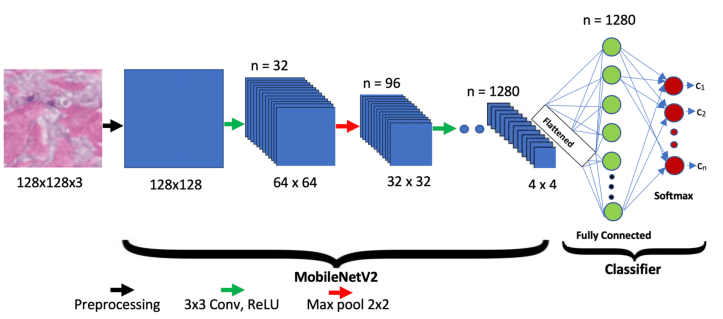
* **[MobileNetV2](https://arxiv.org/abs/1801.04381)**
* **MobileNetV2**
구글이 경량화된 딥러닝 모델로 개발한 네트워크로, 특히 모바일 및 임베디드 장치에서의 사용을 염두에 두고 설계되었습니다. 이 모델은 효율적인 계산과 메모리 사용을 통해 실시간 애플리케이션에서도 높은 성능을 유지할 수 있습니다.

* **MobileNetV2 장점**
    * 효율성: MobileNetV2는 컴퓨팅 자원이 제한된 환경에서도 높은 성능을 유지할 수 있도록 설계되었습니다. 이는 특히 모바일 장치에서 유용합니다.
    * 높은 성능: MobileNetV2는 모델의 크기와 계산 복잡도를 줄이면서도 ImageNet 데이터셋에서 높은 정확도를 유지합니다.
    * 확장성: MobileNetV2는 다양한 비전 애플리케이션에 쉽게 적용할 수 있습니다. 예를 들어, 객체 검출, 세그멘테이션, 얼굴 인식 등 다양한 작업에서 사용될 수 있습니다.
    * 실시간 처리: 경량화된 구조 덕분에 MobileNetV2는 실시간 처리가 필요한 애플리케이션에서도 원활하게 동작합니다.
    
* **MobileNetV2의 응용 분야**
    * 이미지 분류: 다양한 이미지 분류 작업에서 높은 효율성과 성능을 제공합니다.
    * 객체 검출: SSD(Single Shot MultiBox Detector)와 같은 모델의 백본으로 사용되어 객체 검출 작업에서 실시간 성능을 제공합니다.
    * 세그멘테이션: 다양한 세그멘테이션 작업에서 MobileNetV2를 백본 네트워크로 사용하여 경량화된 모델을 구축할 수 있습니다.
    * 얼굴 인식 및 감지: 모바일 및 임베디드 시스템에서 얼굴 인식 애플리케이션에 사용될 수 있습니다.

## **Step 4. 회고**
***

오늘도 이번주와 마찬가지로 컴퓨터비전에 대한 실습을 진행했는데, 생각했던 것보다 훨씬 재밌었다. 

코드나 수학적인 공식으로 봤었을 때보다 직접 결과물을 보고 이에 대해서 알아가는 과정이 성장하는 느낌도 들고 좋았었다.

어려웠던 점은 앞서 언급했다시피, 다른 객체는 그래도 세그멘테이션을 바탕으로 아웃포커싱을 잘했는데, 비행기 객체만 세그멘테이션을 잘했지만, 아웃포커싱이 잘 안됐던 것 같았다. 특히 이 객체를 가지고 1시간 정도 해결하고자 했는데, 해결하지 못한 점이 아쉬움으로 남는다.

아쉬웠던 점 하나 더! 원래 코랩으로 실습을 진행했어서 이번 파트도 코랩 환경에서 진행하려고 했지만, 모델을 불러오는 과정에서 문제가 계속 발생했었다. 아마 버전 차이가 원인이 아닐까 싶은데, 이걸 아직 해결을 못했다.

이후에 노드 실습 과정과 더불어 구글의 `struct2Depth`나 `Mask R-CNN` 등 다양한 컴퓨터비전 기술에 대해서 살짝 봤는데, 훨씬 어려운 내용이 있었지만, 흥미를 유발하는 내용도 있었다. 특히 `MobileNetV2`이 인상 깊었는데, 그 이유는 컴퓨터비전 실습이나 케창딥 실습을 진행하면서 작동 시간에서 항상 문제가 있었는데, 이를 해결하고자 한 시도가 있었기 때문이다.

하여튼 컴퓨터비전에 대해 한걸음 알아간 기분이어서 보람찼던 실습이었다.